# Data Exploration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_io import get_data
from collections import Counter

In [2]:
k = 1
species = 'human'
form = 'split'
drop=0.0
kmer_representation = 'dense'
representation = '1-hot'

In [3]:
X_train_raw, y_train = get_data(species, form=form, mode='train', k=k, drop=drop)

100%|██████████| 500000/500000 [00:28<00:00, 17724.30it/s]


## One nucleotides right before/after the acceptor site

In [4]:
neg_count_before = Counter(X_train_raw[y_train == -1][:,196])
pos_count_before = Counter(X_train_raw[y_train == 1][:,196])

neg_count_after = Counter(X_train_raw[y_train == -1][:,199])
pos_count_after = Counter(X_train_raw[y_train == 1][:,199])

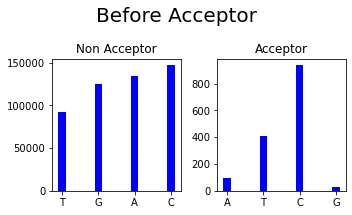

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].bar(list(neg_count_before),neg_count_before.values(),width=0.2, color='b', align='center',)
axes[0].set_title('Non Acceptor')
axes[1].bar(list(pos_count_before),pos_count_before.values(),width=0.2, color='b', align='center')
axes[1].set_title('Acceptor')
fig.suptitle('Before Acceptor', fontsize=20)
fig.tight_layout()

This shows us quite cleary that C seems to be the preferred nucleotide right before the acceptor site.

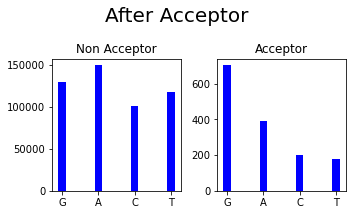

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].bar(list(neg_count_after),neg_count_after.values(),width=0.2, color='b', align='center',)
axes[0].set_title('Non Acceptor')
axes[1].bar(list(pos_count_after),pos_count_after.values(),width=0.2, color='b', align='center')
axes[1].set_title('Acceptor')
fig.suptitle('After Acceptor', fontsize=20)
fig.tight_layout()

After the acceptor site, G seems to be the most common nucleutide for the acceptors.

## Ten nucleotides before/after the acceptor site

In [7]:
neg_count_before = Counter(X_train_raw[y_train == -1][:,186:196].ravel())
pos_count_before = Counter(X_train_raw[y_train == 1][:,186:196].ravel())

neg_count_after = Counter(X_train_raw[y_train == -1][:,199:209].ravel())
pos_count_after = Counter(X_train_raw[y_train == 1][:,199:209].ravel())

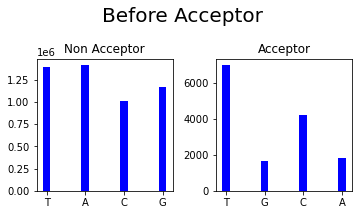

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].bar(list(neg_count_before),neg_count_before.values(),width=0.2, color='b', align='center',)
axes[0].set_title('Non Acceptor')
axes[1].bar(list(pos_count_before),pos_count_before.values(),width=0.2, color='b', align='center')
axes[1].set_title('Acceptor')
fig.suptitle('Before Acceptor', fontsize=20)
fig.tight_layout()

Here the pattern shifts again, now we see an increase in nucleotide T before the acceptor site.

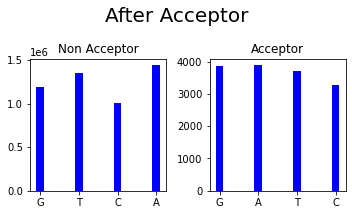

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].bar(list(neg_count_after),neg_count_after.values(),width=0.2, color='b', align='center',)
axes[0].set_title('Non Acceptor')
axes[1].bar(list(pos_count_after),pos_count_after.values(),width=0.2, color='b', align='center')
axes[1].set_title('Acceptor')
fig.suptitle('After Acceptor', fontsize=20)
fig.tight_layout()

However, this observation can not be made for the region after the acceptor site.

In the following, we want to examine the porportion of the nucleotides for the whole region before and after the acceptor site.

## All nucleotides before/after the acceptor site

In [10]:
neg_count_before = Counter(X_train_raw[y_train == -1][:,0:196].ravel())
pos_count_before = Counter(X_train_raw[y_train == 1][:,0:196].ravel())

neg_count_after = Counter(X_train_raw[y_train == -1][:,199:398].ravel())
pos_count_after = Counter(X_train_raw[y_train == 1][:,199:398].ravel())


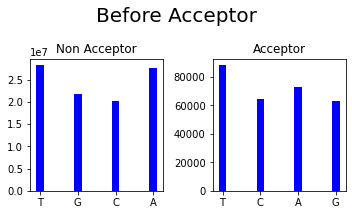

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].bar(list(neg_count_before),neg_count_before.values(),width=0.2, color='b', align='center',)
axes[0].set_title('Non Acceptor')
axes[1].bar(list(pos_count_before),pos_count_before.values(),width=0.2, color='b', align='center')
axes[1].set_title('Acceptor')
fig.suptitle('Before Acceptor', fontsize=20)
fig.tight_layout()

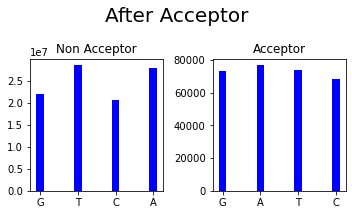

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].bar(list(neg_count_after),neg_count_after.values(),width=0.2, color='b', align='center',)
axes[0].set_title('Non Acceptor')
axes[1].bar(list(pos_count_after),pos_count_after.values(),width=0.2, color='b', align='center')
axes[1].set_title('Acceptor')
fig.suptitle('After Acceptor', fontsize=20)
fig.tight_layout()

For the whole region, there are no strong effects to be observed.

In the following, we want to examine the porportion of the nucleotides for windows of varying length before and after the acceptor site.

## Nucleotides before/after the acceptor site for different lengths

In [13]:
neg_count_before = []
pos_count_before = []

neg_count_after = []
pos_count_after = []

length = 190
step_size = 30

for lengths in range(0,length,step_size):
    neg_count_before.append([dict(Counter(X_train_raw[y_train == -1][:,lengths:196].ravel()))[c] for c in ['A','C','G','T']])
    pos_count_before.append([dict(Counter(X_train_raw[y_train == 1][:,lengths:196].ravel()))[c] for c in ['A','C','G','T']])
    neg_count_after.append([dict(Counter(X_train_raw[y_train == -1][:,199:205+lengths].ravel()))[c] for c in ['A','C','G','T']])
    pos_count_after.append([dict(Counter(X_train_raw[y_train == 1][:,199:205+lengths].ravel()))[c] for c in ['A','C','G','T']])



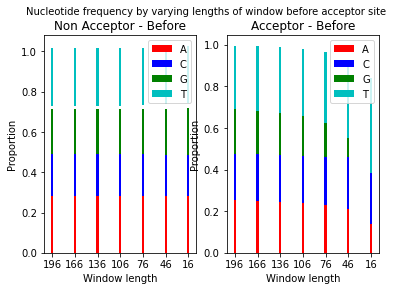

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2)

map_dict = {'196': 1, '166': 2, '136': 3, '106':4, '76':5, '46':6, '16':7}

ax[0].bar(np.linspace(1,len(neg_count_before),7), [neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, color='r',label='A')
ax[0].bar(np.linspace(1,len(neg_count_before),7), [neg_count_before[i][1]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, bottom=[neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], color='b',label='C')
ax[0].bar(np.linspace(1,len(neg_count_before),7), [neg_count_before[i][2]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, bottom=np.array([neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]) + np.array([neg_count_before[i][1]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]), color='g',label='G')
ax[0].bar(np.linspace(1,len(neg_count_before),7), [neg_count_before[i][3]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, bottom=np.array([neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]) + np.array([neg_count_before[i][2]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]) + np.array([neg_count_before[i][2]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]), color='c',label='T')

ax[0].set_xlabel('Window length')
ax[0].set_ylabel('Proportion')
ax[0].set_title('Non Acceptor - Before')
ax[0].set_xticks(range(1, 8))
ax[0].set_xticklabels(map_dict.keys())
ax[0].legend()

ax[1].bar(np.linspace(1,len(pos_count_before),7), [pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, color='r',label='A')
ax[1].bar(np.linspace(1,len(pos_count_before),7), [pos_count_before[i][1]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, bottom=[pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], color='b',label='C')
ax[1].bar(np.linspace(1,len(pos_count_before),7), [pos_count_before[i][2]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, bottom=np.array([pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]) + np.array([pos_count_before[i][1]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]), color='g',label='G')
ax[1].bar(np.linspace(1,len(pos_count_before),7), [pos_count_before[i][3]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, bottom=np.array([pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]) + np.array([pos_count_before[i][2]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]) + np.array([pos_count_before[i][2]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]), color='c',label='T')

ax[1].set_xlabel('Window length')
ax[1].set_ylabel('Proportion')
ax[1].set_title('Acceptor - Before')
ax[1].set_xticks(range(1, 8))
ax[1].set_xticklabels(map_dict.keys())
ax[1].legend()

fig.suptitle('Nucleotide frequency by varying lengths of window before acceptor site', fontsize=10)

plt.show()

Here we see, that especially in the region right before the acceptor site, the proportion of the nucleotides shifts strongly towards T.

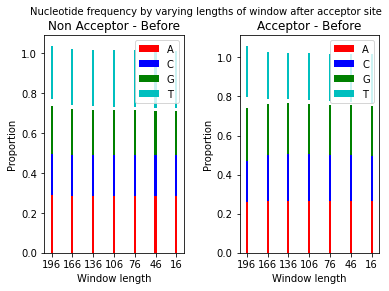

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)

map_dict = {'196': 1, '166': 2, '136': 3, '106':4, '76':5, '46':6, '16':7}

ax[0].bar(np.linspace(1,len(neg_count_after),7), [neg_count_after[i][0]/sum(neg_count_after[i]) for i in range(len(neg_count_after))], width = 0.1, color='r',label='A')
ax[0].bar(np.linspace(1,len(neg_count_after),7), [neg_count_after[i][1]/sum(neg_count_after[i]) for i in range(len(neg_count_after))], width = 0.1, bottom=[neg_count_after[i][0]/sum(neg_count_after[i]) for i in range(len(neg_count_after))], color='b',label='C')
ax[0].bar(np.linspace(1,len(neg_count_after),7), [neg_count_after[i][2]/sum(neg_count_after[i]) for i in range(len(neg_count_after))], width = 0.1, bottom=np.array([neg_count_after[i][0]/sum(neg_count_after[i]) for i in range(len(neg_count_after))]) + np.array([neg_count_after[i][1]/sum(neg_count_after[i]) for i in range(len(neg_count_after))]), color='g',label='G')
ax[0].bar(np.linspace(1,len(neg_count_after),7), [neg_count_after[i][3]/sum(neg_count_after[i]) for i in range(len(neg_count_after))], width = 0.1, bottom=np.array([neg_count_after[i][0]/sum(neg_count_after[i]) for i in range(len(neg_count_after))]) + np.array([neg_count_after[i][2]/sum(neg_count_after[i]) for i in range(len(neg_count_after))]) + np.array([neg_count_after[i][2]/sum(neg_count_after[i]) for i in range(len(neg_count_after))]), color='c',label='T')

ax[0].set_xlabel('Window length')
ax[0].set_ylabel('Proportion')
ax[0].set_title('Non Acceptor - Before')
ax[0].set_xticks(range(1, 8))
ax[0].set_xticklabels(map_dict.keys())
ax[0].legend()

ax[1].bar(np.linspace(1,len(pos_count_after),7), [pos_count_after[i][0]/sum(pos_count_after[i]) for i in range(len(pos_count_after))], width = 0.1, color='r',label='A')
ax[1].bar(np.linspace(1,len(pos_count_after),7), [pos_count_after[i][1]/sum(pos_count_after[i]) for i in range(len(pos_count_after))], width = 0.1, bottom=[pos_count_after[i][0]/sum(pos_count_after[i]) for i in range(len(pos_count_after))], color='b',label='C')
ax[1].bar(np.linspace(1,len(pos_count_after),7), [pos_count_after[i][2]/sum(pos_count_after[i]) for i in range(len(pos_count_after))], width = 0.1, bottom=np.array([pos_count_after[i][0]/sum(pos_count_after[i]) for i in range(len(pos_count_after))]) + np.array([pos_count_after[i][1]/sum(pos_count_after[i]) for i in range(len(pos_count_after))]), color='g',label='G')
ax[1].bar(np.linspace(1,len(pos_count_after),7), [pos_count_after[i][3]/sum(pos_count_after[i]) for i in range(len(pos_count_after))], width = 0.1, bottom=np.array([pos_count_after[i][0]/sum(pos_count_after[i]) for i in range(len(pos_count_after))]) + np.array([pos_count_after[i][2]/sum(pos_count_after[i]) for i in range(len(pos_count_after))]) + np.array([pos_count_after[i][2]/sum(pos_count_after[i]) for i in range(len(pos_count_after))]), color='c',label='T')

ax[1].set_xlabel('Window length')
ax[1].set_ylabel('Proportion')
ax[1].set_title('Acceptor - Before')
ax[1].set_xticks(range(1, 8))
ax[1].set_xticklabels(map_dict.keys())
ax[1].legend()

fig.suptitle('Nucleotide frequency by varying lengths of window after acceptor site', fontsize=10)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

The effect that we observed right before the acceptor site does not seem to be equally present after the acceptor site.

### We examine the region before the acceptor site more closely

In [16]:
neg_count_before = []
pos_count_before = []

neg_count_after = []
pos_count_after = []

length = 15
step_size = 5

for lengths in range(0,length,step_size):
    neg_count_before.append([dict(Counter(X_train_raw[y_train == -1][:,193-lengths:196].ravel()))[c] for c in ['A','C','G','T']])
    pos_count_before.append([dict(Counter(X_train_raw[y_train == 1][:,193-lengths:196].ravel()))[c] for c in ['A','C','G','T']])
    neg_count_after.append([dict(Counter(X_train_raw[y_train == -1][:,199:202+lengths].ravel()))[c] for c in ['A','C','G','T']])
    pos_count_after.append([dict(Counter(X_train_raw[y_train == 1][:,199:202+lengths].ravel()))[c] for c in ['A','C','G','T']])




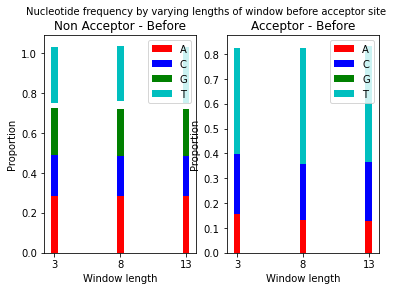

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2)

map_dict = {'3': 1, '8': 2, '13': 3}

ax[0].bar(np.linspace(1,len(neg_count_before),3), [neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, color='r',label='A')
ax[0].bar(np.linspace(1,len(neg_count_before),3), [neg_count_before[i][1]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, bottom=[neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], color='b',label='C')
ax[0].bar(np.linspace(1,len(neg_count_before),3), [neg_count_before[i][2]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, bottom=np.array([neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]) + np.array([neg_count_before[i][1]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]), color='g',label='G')
ax[0].bar(np.linspace(1,len(neg_count_before),3), [neg_count_before[i][3]/sum(neg_count_before[i]) for i in range(len(neg_count_before))], width = 0.1, bottom=np.array([neg_count_before[i][0]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]) + np.array([neg_count_before[i][2]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]) + np.array([neg_count_before[i][2]/sum(neg_count_before[i]) for i in range(len(neg_count_before))]), color='c',label='T')

ax[0].set_xlabel('Window length')
ax[0].set_ylabel('Proportion')
ax[0].set_title('Non Acceptor - Before')
ax[0].set_xticks(range(1, 4))
ax[0].set_xticklabels(map_dict.keys())
ax[0].legend()

ax[1].bar(np.linspace(1,len(pos_count_before),3), [pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, color='r',label='A')
ax[1].bar(np.linspace(1,len(pos_count_before),3), [pos_count_before[i][1]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, bottom=[pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], color='b',label='C')
ax[1].bar(np.linspace(1,len(pos_count_before),3), [pos_count_before[i][2]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, bottom=np.array([pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]) + np.array([pos_count_before[i][1]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]), color='g',label='G')
ax[1].bar(np.linspace(1,len(pos_count_before),3), [pos_count_before[i][3]/sum(pos_count_before[i]) for i in range(len(pos_count_before))], width = 0.1, bottom=np.array([pos_count_before[i][0]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]) + np.array([pos_count_before[i][2]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]) + np.array([pos_count_before[i][2]/sum(pos_count_before[i]) for i in range(len(pos_count_before))]), color='c',label='T')

ax[1].set_xlabel('Window length')
ax[1].set_ylabel('Proportion')
ax[1].set_title('Acceptor - Before')
ax[1].set_xticks(range(1, 4))
ax[1].set_xticklabels(map_dict.keys())
ax[1].legend()

fig.suptitle('Nucleotide frequency by varying lengths of window before acceptor site', fontsize=10)

plt.show()

We can see here that the effect is especially present in a window of about 10 nucleotides before the acceptor site. Judging from that, if we were to include count data of the nucleotides, we could to this with a relatively small model.

# Logo Plot

In [18]:
import logomaker as lm

In [19]:
train_split = pd.read_csv('data/human_dna_train_split.csv')

In [20]:
acceptor = train_split['sequences'][train_split['labels'] == 1]
non_acceptor = train_split['sequences'][train_split['labels'] == -1]

In [21]:
nn_df_acc = lm.alignment_to_matrix(sequences=acceptor,to_type='probability')
nn_df_non_acc = lm.alignment_to_matrix(sequences=non_acceptor,to_type='probability')

In [22]:
window = 20

### Acceptor Logo Plot

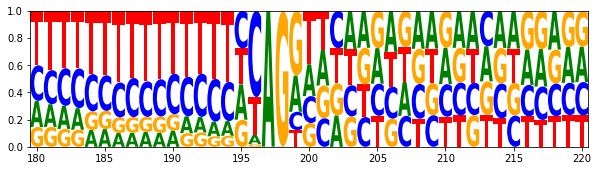

In [23]:
nn_logo_acc = lm.Logo(nn_df_acc.loc[200-window:200+window,:])

### Non-Acceptor Logo Plot

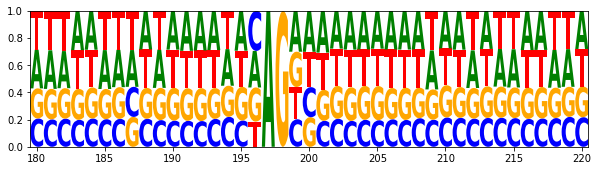

In [24]:
nn_logo_non_acc = lm.Logo(nn_df_non_acc.loc[200-window:200+window,:])

Tho plots confirm the the findings above. Moreover, the pattern that we observe more T's before the acceptor site is not due to very high probablitity of the T in a few specific locations but rather an increased probablitity over the whole window. We also see that the probability of the T decreases when moving away from the acceptor site.